## Exploratory ML Notebook

We have a cross-sectional dataset of the number of the physical characteristics of . This dataset is taken from the University of California Irvine's [online machine learning data repository](https://archive.ics.uci.edu/). The online documentation for this dataset can be found [here](https://archive.ics.uci.edu/dataset/1/abalone). The machine learning task is to create a regression model that predicts the number of internal shell rings of an abalone mollusc based on its external characteristics.

To complete this task we will be using the [TensorFlow](https://www.tensorflow.org/) machine learning library. Tutorials can be accessed [here](https://www.tensorflow.org/tutorials?_gl=1*k1sdc8*_up*MQ..*_ga*MTAyMTc4MTE1LjE3MTk3OTIwMTY.*_ga_W0YLR4190T*MTcxOTc5MjAxNS4xLjAuMTcxOTc5MjAxNS4wLjAuMA..).

### Introduction

Package imports

In [1]:
from ucimlrepo import fetch_ucirepo
import tensorflow as tf
import pandas as pd
import numpy as np

/Users/dorsa/Desktop/mss-rap-project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Read in and preview the dataset. We can see we have a cross-sectional dataset of characteristics of abalone molluscs.

In [2]:
abalones = fetch_ucirepo(id=1)

abalones.data.original.head(7)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


Let's examine the target variable for this dataset, `Rings`.

In [4]:
abalones.data.targets.describe()

,Rings
count,4177.000000
mean,9.933684
std,3.224169
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


Let's now examine the features in this dataset. The majority of the features are numeric data, such as the height and weight of a mollusc, but we also have a categorical feature which is the sex of the mollusc.

In [5]:
abalones.data.features.describe(include='all')

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000


We can use a linear regression model to predict the number of internal rings of an abalone mollusc based on a combination of the features we have been provided with.

### ML analysis

#### Tasks for today:
- Preprocess the data
- Build and train a linear regression model using the abalone DataFrame

In [3]:
df = pd.DataFrame(abalones.data.features)
df['Rings'] = abalones.data.targets
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [7]:
# map sex categories to numbers. m to 0, f to 1 and i to 2

df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2})
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
df.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

# EDA

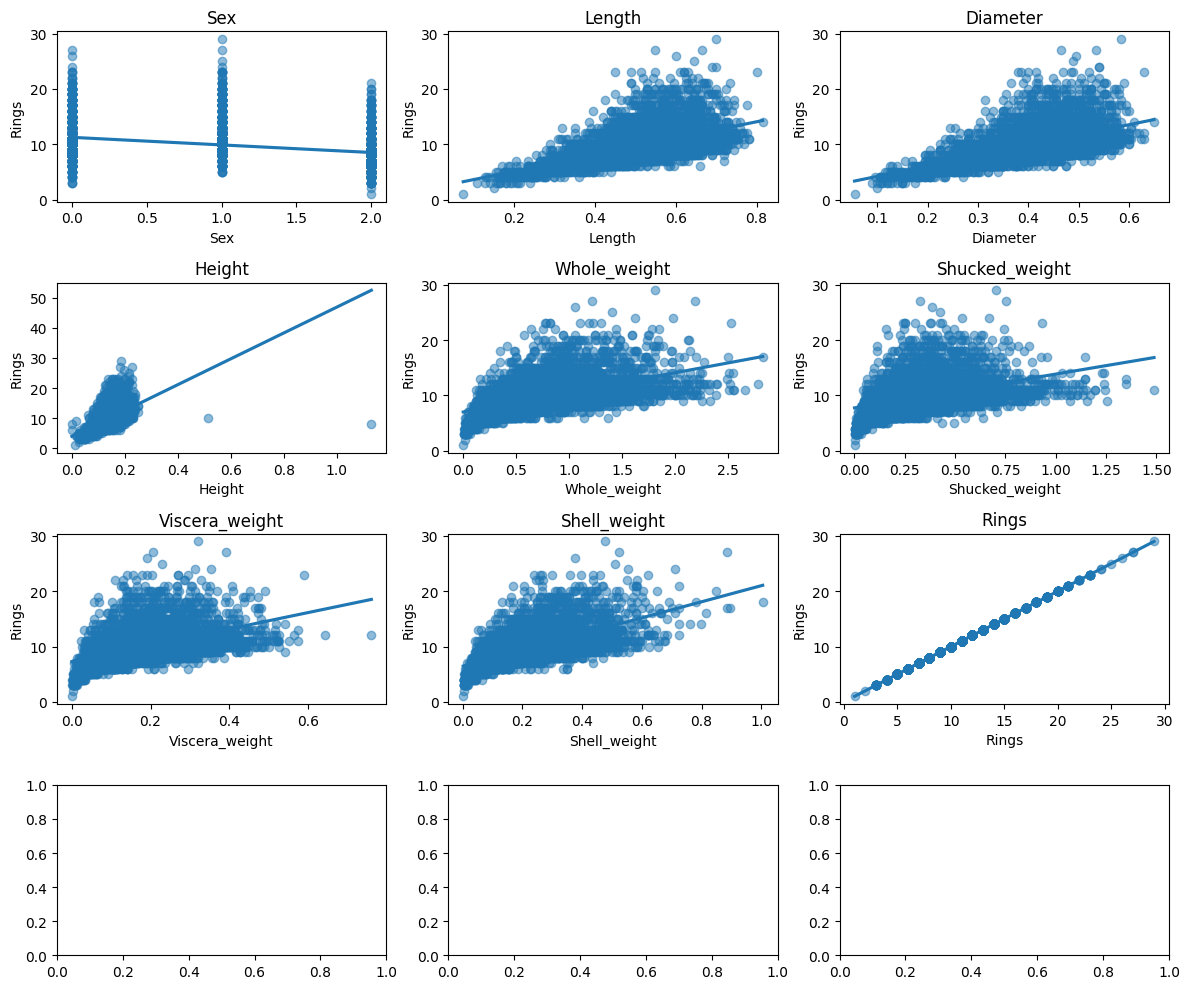

In [12]:
# a scatter plot for all columns vs y="Rings" in a subplot

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
for i, col in enumerate(df.columns):
  sns.regplot(x=col, y="Rings", data=df, ax=axes[i // 3, i % 3], ci=None, scatter_kws={'alpha': 0.5})
  axes[i // 3, i % 3].set_title(col)
plt.tight_layout()
plt.show()

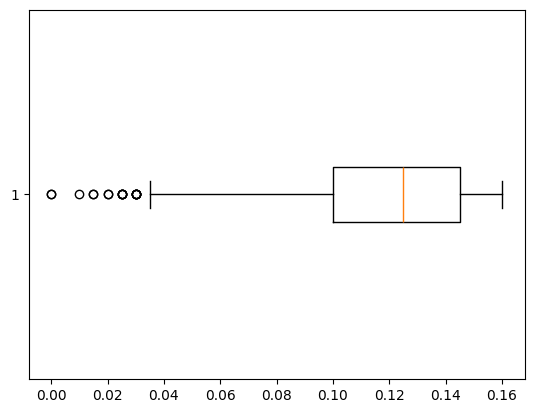

In [13]:
# drop the top 25% of the height from the dataset

height_75_percentile = df['Height'].quantile(0.75)
df = df[df['Height'] < height_75_percentile]
plt.boxplot(df['Height'], vert=False)
plt.show();

# Useful functions

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_preds(y_true, y_preds):
  """
  Performs evaluation comparison on y_true labels vs y_preds labels
  on a classification model.
  """
  accuracy = r2_score(y_true, y_preds)
  precision = mean_absolute_error(y_true, y_preds)
  recall = mean_squared_error(y_true, y_preds)

  metric_dict = {"accuracy": round(accuracy, 2),
                "precision": round(precision, 2),
                "recall": round(recall, 2)
                }

  print(f"Acc: {accuracy*100:.2f}%")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")

  return metric_dict

# Build model

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Shuffle the data
df_shuffled = df.sample(frac=1)

# Split into X and y
X = df_shuffled.drop("Rings", axis=1)
y = df_shuffled["Rings"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(df_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(df_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]


rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make baseline predictions
y_preds = rf.predict(X_valid)

# Evaluate the regressor on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 57.49%
Precision: 1.38
Recall: 3.92


{'accuracy': 0.57, 'precision': 1.38, 'recall': 3.92}